In [1]:
import re

from collections import defaultdict
from conceptnet import ConceptNet
from dbpedia import DBPedia
import utils

wrap_cn = ConceptNet()
wrap_db = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

def snake_to_camel(text):
    return ''.join(x.capitalize() or '_' for x in text.split('_'))

In [2]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)

napkin {('Napkin', 'TableLinen', 'IsA'), ('TableLinen', 'Linen', 'IsA')} {('Rectangle', 'Quadrilateral', 'has_hypernym'), ('Napkin', 'Rectangle', 'has_hypernym'), ('Rectangle', 'Bone', 'rfd:type')} set()
slipper {('Slipper', 'Footwear', 'IsA'), ('Footwear', 'Clothing', 'IsA'), ('Footwear', 'Covering', 'IsA')} {('Slipper', 'Fashion', 'rfd:type'), ('Slipper', 'Shoes', 'has_hypernym')} set()
pot {('Belly', 'Underpart', 'IsA'), ('Belly', 'AdiposeTissue', 'IsA'), ('Stake', 'Post', 'IsA'), ('Container', 'Instrumentality', 'IsA'), ('Cannabis', 'SoftDrug', 'IsA'), ('Pot', 'Container', 'IsA'), ('Belly', 'Inside', 'IsA'), ('Vessel', 'Craft', 'IsA'), ('Belly', 'Bulge', 'IsA'), ('Vessel', 'Tube', 'IsA'), ('Stake', 'InstrumentOfExecution', 'IsA'), ('Pot', 'CookingUtensil', 'IsA'), ('CookingUtensil', 'KitchenUtensil', 'IsA'), ('Stake', 'Gamble', 'IsA'), ('Pot', 'Stake', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA'), ('Pot', 'Cannabis', 'IsA'), ('Pot', 'Belly', 'IsA'), ('Cannabis', 'Controlle

retrying...
tub {('Tub', 'Vessel', 'IsA'), ('Vessel', 'Craft', 'IsA'), ('Tub', 'Containerful', 'IsA'), ('Vessel', 'Container', 'IsA'), ('Vessel', 'Tube', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA')} set() set()
tablecloth {('Tablecloth', 'TableLinen', 'IsA'), ('TableLinen', 'Linen', 'IsA')} {('Tablecloth', 'Cloth', 'has_hypernym'), ('Tablecloth', 'Fashion', 'rfd:type')} set()
aspirin {('Aspirin', 'Salicylate', 'IsA'), ('Salicylate', 'Salt', 'IsA'), ('Salicylate', 'NonsteroidalAntiInflammatory', 'IsA')} {('Aspirin', 'ChemicalSubstance', 'rfd:type'), ('Aspirin', 'Drug', 'rfd:type'), ('Aspirin', 'Medication', 'has_hypernym')} set()
radio {('CommunicationSystem', 'System', 'IsA'), ('CommunicationSystem', 'Facility', 'IsA'), ('Radio', 'CommunicationSystem', 'IsA'), ('Broadcasting', 'Telecommunication', 'IsA'), ('Radio', 'Broadcasting', 'IsA')} {('Radio', 'Use', 'has_hypernym')} set()
mayo set() set() set()
message {('Communication', 'Connection', 'IsA'), ('Communication', 'Act', '

lot {('Tract', 'System', 'IsA'), ('Lot', 'Tract', 'IsA'), ('Tract', 'GeographicalArea', 'IsA')} set() set()
reading {('Measurement', 'Activity', 'IsA'), ('Reading', 'Interpretation', 'IsA'), ('Reading', 'LinguisticProcess', 'IsA'), ('Reading', 'Measurement', 'IsA'), ('Reading', 'WrittenCommunication', 'IsA'), ('LinguisticProcess', 'HumanProcess', 'IsA'), ('Interpretation', 'Representation', 'IsA'), ('Interpretation', 'Explanation', 'IsA'), ('WrittenCommunication', 'Communication', 'IsA'), ('Reading', 'Datum', 'IsA'), ('LinguisticProcess', 'HigherCognitiveProcess', 'IsA'), ('Datum', 'Information', 'IsA')} set() set()
eyeglass set() {('Glasses', 'Device', 'rfd:type'), ('Glasses', 'Devices', 'has_hypernym')} set()
newspaper {('Press', 'Clamp', 'IsA'), ('Product', 'Quantity', 'IsA'), ('Product', 'Chemical', 'IsA'), ('Newspaper', 'Press', 'IsA'), ('Newspaper', 'Product', 'IsA'), ('Newspaper', 'Publisher', 'IsA'), ('Publisher', 'Owner', 'IsA'), ('Press', 'Weightlifting', 'IsA'), ('Publisher'

rag {('Week', 'TimePeriod', 'IsA'), ('PracticalJoke', 'Antic', 'IsA'), ('Rag', 'PieceOfCloth', 'IsA'), ('PieceOfCloth', 'Fabric', 'IsA'), ('Rag', 'PracticalJoke', 'IsA'), ('Rag', 'Week', 'IsA')} set() set()
plate {('Plate', 'Anode', 'IsA'), ('Structure', 'Cognition', 'IsA'), ('Anode', 'Electrode', 'IsA'), ('Receptacle', 'PlantPart', 'IsA'), ('Entree', 'Course', 'IsA'), ('Structure', 'Constitution', 'IsA'), ('Flatware', 'Silverware', 'IsA'), ('Anode', 'Terminal', 'IsA'), ('Entree', 'Right', 'IsA'), ('Plate', 'Structure', 'IsA'), ('Plate', 'Crust', 'IsA'), ('Entree', 'Entrance', 'IsA'), ('Receptacle', 'Fitting', 'IsA'), ('Plate', 'Entree', 'IsA'), ('Crust', 'Discourtesy', 'IsA'), ('Crust', 'Layer', 'IsA'), ('Sheet', 'Expanse', 'IsA'), ('Plate', 'StructuralMember', 'IsA'), ('Sheet', 'BedLinen', 'IsA'), ('Plate', 'CutOfBeef', 'IsA'), ('Plate', 'Sheet', 'IsA'), ('Plate', 'Flatware', 'IsA'), ('Structure', 'BodyPart', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA'), ('Illustration', 'Ar

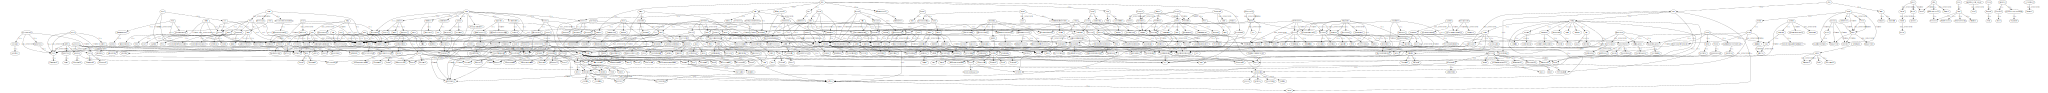

In [3]:
all_hypernyms = defaultdict(lambda: 0)
both_hypernyms = defaultdict(lambda: 0)
all_edges = set()
#both_edges = set()
for w in frame_lemmas:
    id_cn = wrap_cn.get_id(w)
    hypernyms_cn, edges_cn = wrap_cn.get_isa_tree(id_cn)
    hypernyms_cn = set([snake_to_camel(wrap_cn.get_name(el)) for el in hypernyms_cn])
    edges_cn = graph_utils.edges_name_normalize(edges_cn, lambda a: snake_to_camel(wrap_cn.get_name(a)))
    id_db = wrap_db.get_id(w)
    hypernyms_db, edges_db = wrap_db.get_all_types(id_db)
    hypernyms_db = set([wrap_db.get_name(el) for el in hypernyms_db])
    edges_db = graph_utils.edges_name_normalize(edges_db, wrap_db.get_name)
    hypernyms = hypernyms_cn.union(hypernyms_db)
    hypernyms_both = hypernyms_cn & hypernyms_db
    edges = edges_cn.union(edges_db)
    #edges_both = set([(e1[0], e1[1], '+'.join(e1[2], e2[2])) for e1 in edges_cn for e2 in edges_db if (e1[0] == e2[0] and e1[1] == e2[1])]) #edges_cn & edges_db
    for h in hypernyms:
        all_hypernyms[h] += 1
    for h in hypernyms_both:
        both_hypernyms[h] +=1
    print(w, edges_cn, edges_db, hypernyms_both)
    all_edges.update(edges)
    #both_edges.update(edges_both)

graph_utils.create_graph(all_edges)

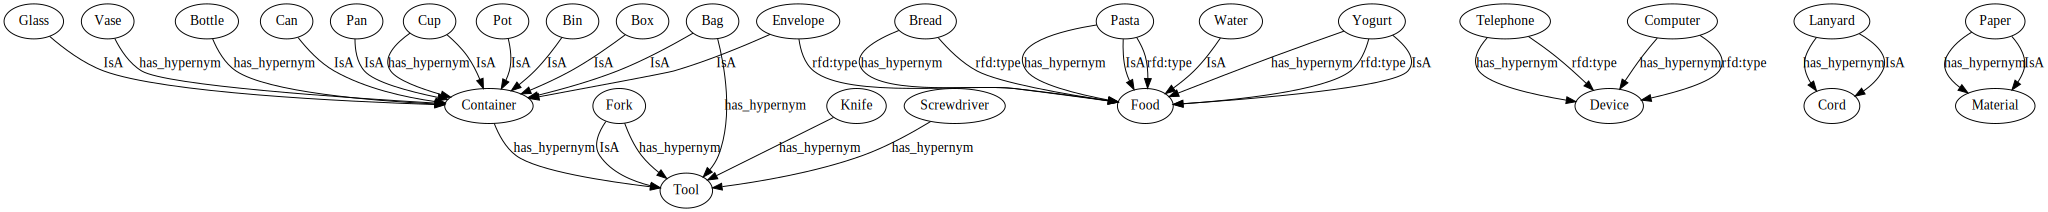

In [4]:
#graph_utils.create_graph(both_edges)
# the graph with edges that belong to both the sets of hypernyms
initial_nodes = [snake_to_camel(el) for el in frame_lemmas]
edges_with_nodes_both = set([e for e in all_edges if (e[0] in initial_nodes + list(both_hypernyms) and e[1] in both_hypernyms)])
graph_utils.create_graph(edges_with_nodes_both)